## Alpha101
*用数学公式找到Alpha机会*

## 目录

1. Alpha101是什么？
2. Alpha101主要元素有什么？？
3. Mask过滤无法交易的股票
4. 编写Alpha101里2-6的因子
5. 可视化与获取因子信号数据
6. 计算权重与保存信号数据

## 1_Alpha101是什么？
WorldQuant根据数据挖掘的方法发掘了101个alpha，据说里面 80% 的因子仍然还行之有效并运行在他们的投资策略中。Alpha101给出的公式，也就是计算机代码101年真实的定量交易Alpha。他们的平均持有期大约范围0.6 - 6.4天。平均两两这些Alpha的相关性较低,为15.9%。回报是与波动强相关，但对换手率没有明显的依赖性，直接确认较早的间接经验分析结果。我们从经验上进一步发现换手率对alpha相关性的解释能力很差。

## 2_Alpha101主要元素有什么？
### 1. 因子组成元素
- 价量因子（52/101）：
    - HLOC
    - ADV
    - VWAP
    - Volume
- 价格波动因子（21/101）:
    - HLOC
    - Return
    - STD()
- 组合因子(8/101): 价量与价波因子组合
- 市值因子（1/101）:
    - Return
    - Cap
- 板块组合因子（19/101）: 板块分类结合价量与价波因子

### 2. 函数与运算符
- 'x?y:z'是指x为True，返回y，否则返回z。
- Rank是指横向的品种间排序。
- ts_Rank是指纵向的时间序列排序。

详细参考原文PDF

## 3_Mask过滤无法交易的股票

In [1]:
import numpy as np
from jaqs.data import DataView
from jaqs.research import SignalDigger
import warnings

warnings.filterwarnings("ignore")
dataview_folder = 'JAQS_Data/hs300'
dv = DataView()
dv.load_dataview(dataview_folder)

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Dataview loaded successfully.


In [2]:
mask = dv.get_ts('mask_index_member')
can_enter = dv.get_ts('can_enter')
can_exit = dv.get_ts('can_exit')

## 4_编写Alpha101里2-6的因子
设计算法，并用add_formula添加至数据文件中。

In [3]:
def add_factor():
    dv.add_formula('alpha002','-1 * Correlation(Rank(Delta(Log(volume), 2)), Rank((close - open) / open), 6)',is_quarterly=False)    
    dv.add_formula('alpha003','-1 * Correlation(Rank(open), Rank(volume), 10)',is_quarterly=False)
    dv.add_formula('alpha004', '-1 * Ts_Rank(Rank(low), 9)', is_quarterly=False)
    dv.add_formula('alpha005', 'Rank((open - (Ts_Sum(vwap, 10) / 10))) * (-1 * Abs(Rank((close - vwap))))', is_quarterly=False)
    dv.add_formula('alpha006','-1 * Correlation(open, volume, 10)',is_quarterly=False)
add_factor()

Add formula failed: name [alpha002] exist. Try another name.
Add formula failed: name [alpha003] exist. Try another name.
Add formula failed: name [alpha004] exist. Try another name.
Add formula failed: name [alpha005] exist. Try another name.
Add formula failed: name [alpha006] exist. Try another name.


## 5_可视化与获取因子信号数据
修改索引与列名

In [4]:
import matplotlib.pyplot as plt

def cal_obj(signal, name, period, quantile):
    price = dv.get_ts('close_adj')
    price_bench = dv.data_benchmark

    # Step.4 analyze!
    obj = SignalDigger(output_folder="hs300/%s" % name,
                       output_format='pdf')

    obj.process_signal_before_analysis(signal,
                                   price=price,
                                   mask=mask,
                                   n_quantiles=quantile, period=period,
#                                    benchmark_price=price_bench,
                                   can_enter = can_enter,
                                   can_exit = can_exit
                                   )
    obj.create_full_report()
    return obj
    
def plot_pfm(signal, name, period=5, quantile=5):
    obj = cal_obj(signal, name, period, quantile)
    obj.fig_objs
    plt.show()
    
def signal_data(signal, name, period=5, quantile=5):
    obj = cal_obj(signal, name, period, quantile)
    return obj.signal_data

In [5]:
signal_2 = dv.get_ts('alpha002')
signal_3 = dv.get_ts('alpha003')
signal_4 = dv.get_ts('alpha004')
signal_5 = dv.get_ts('alpha005')
signal_6 = dv.get_ts('alpha006')

Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%


Value of signals of Different Quantiles Statistics
               min       max      mean       std  count    count %
quantile                                                          
1        -9.286524  0.240108 -0.657372  0.158733  83267  20.144527
2        -0.870919  0.524134 -0.404244  0.168361  82671  20.000339
3        -0.750130  0.693992 -0.210936  0.186283  82653  19.995984
4        -0.652176  0.809343  0.002979  0.195213  82671  20.000339
5        -0.486762  1.000000  0.357873  0.233641  82086  19.858811
Figure saved: C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\hs300\alpha006\returns_report.pdf
Information Analysis
                ic
IC Mean      0.025
IC Std.      0.121
t-stat(IC)     NaN
p-value(IC)    NaN
IC Skew        NaN
IC Kurtosis    NaN
Ann. IR      0.206
Figure saved: C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\hs300\alpha006\information_report.pdf


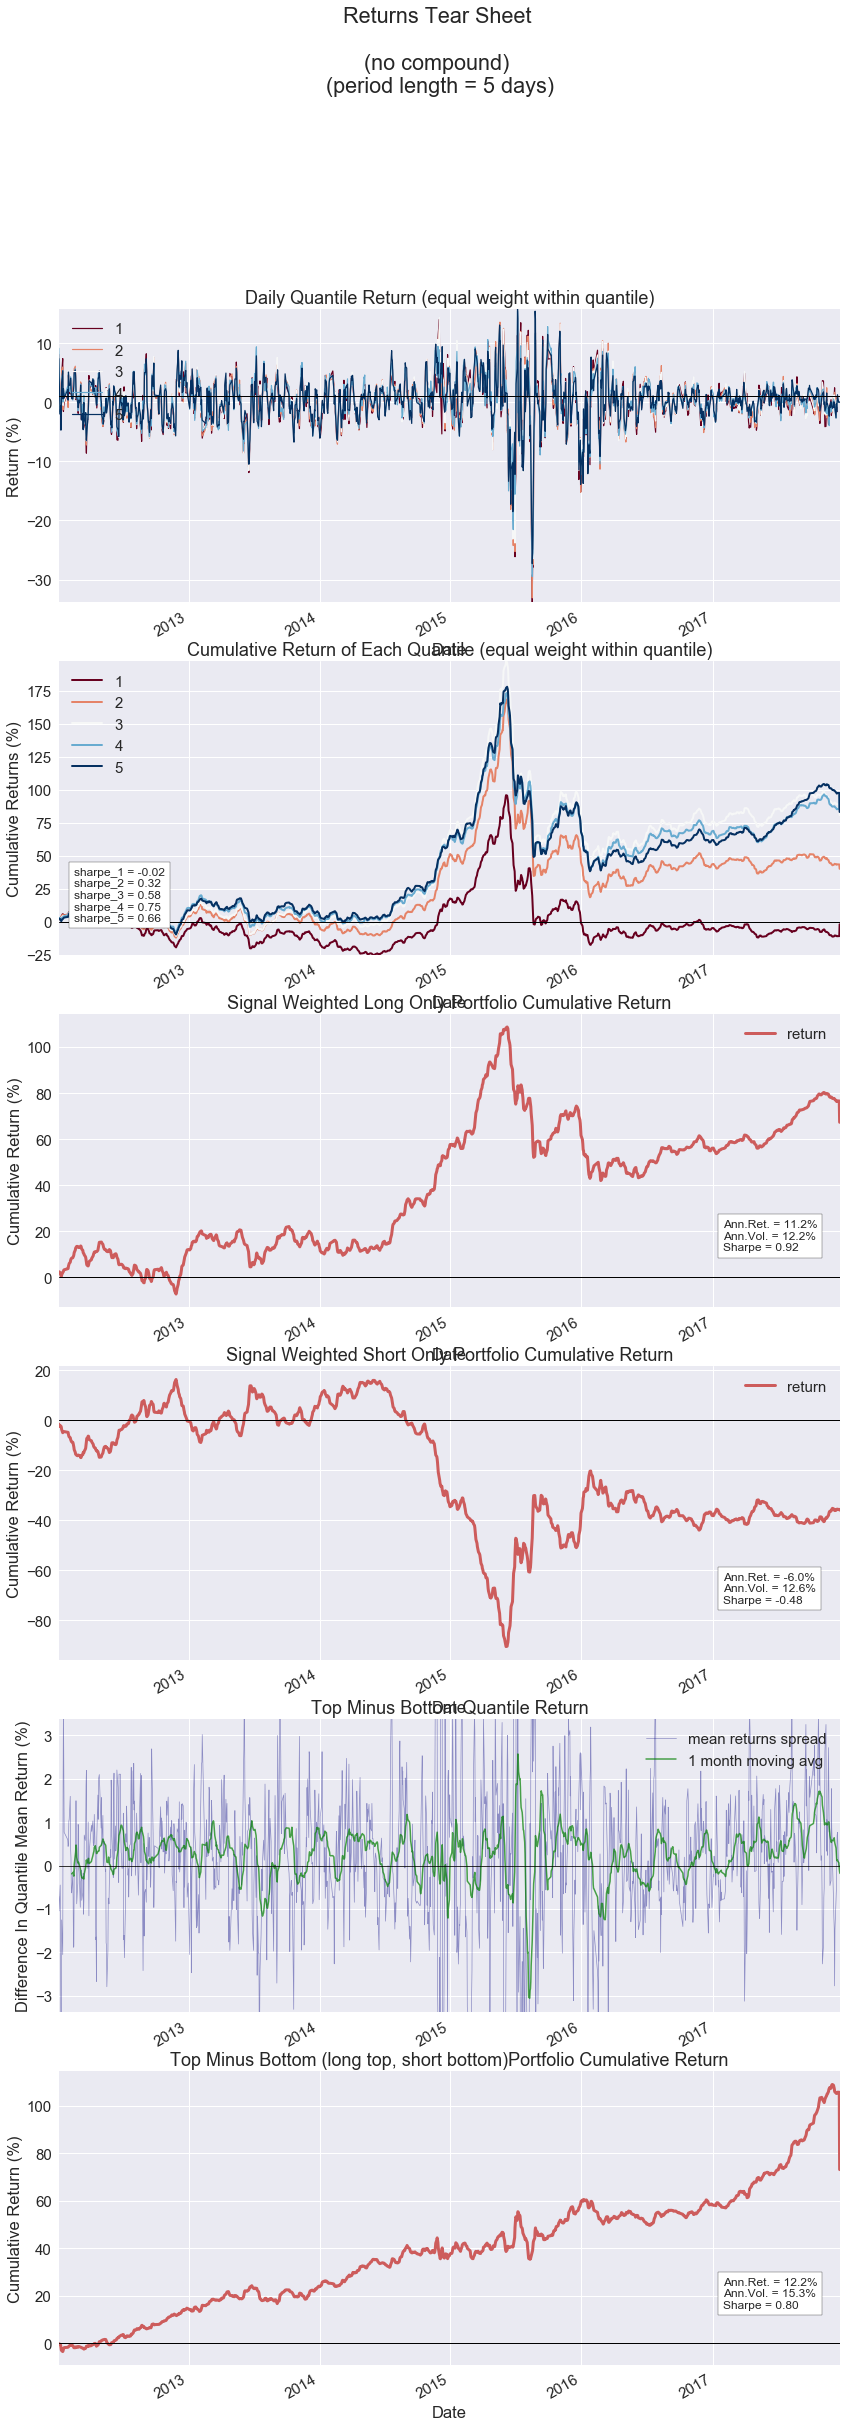

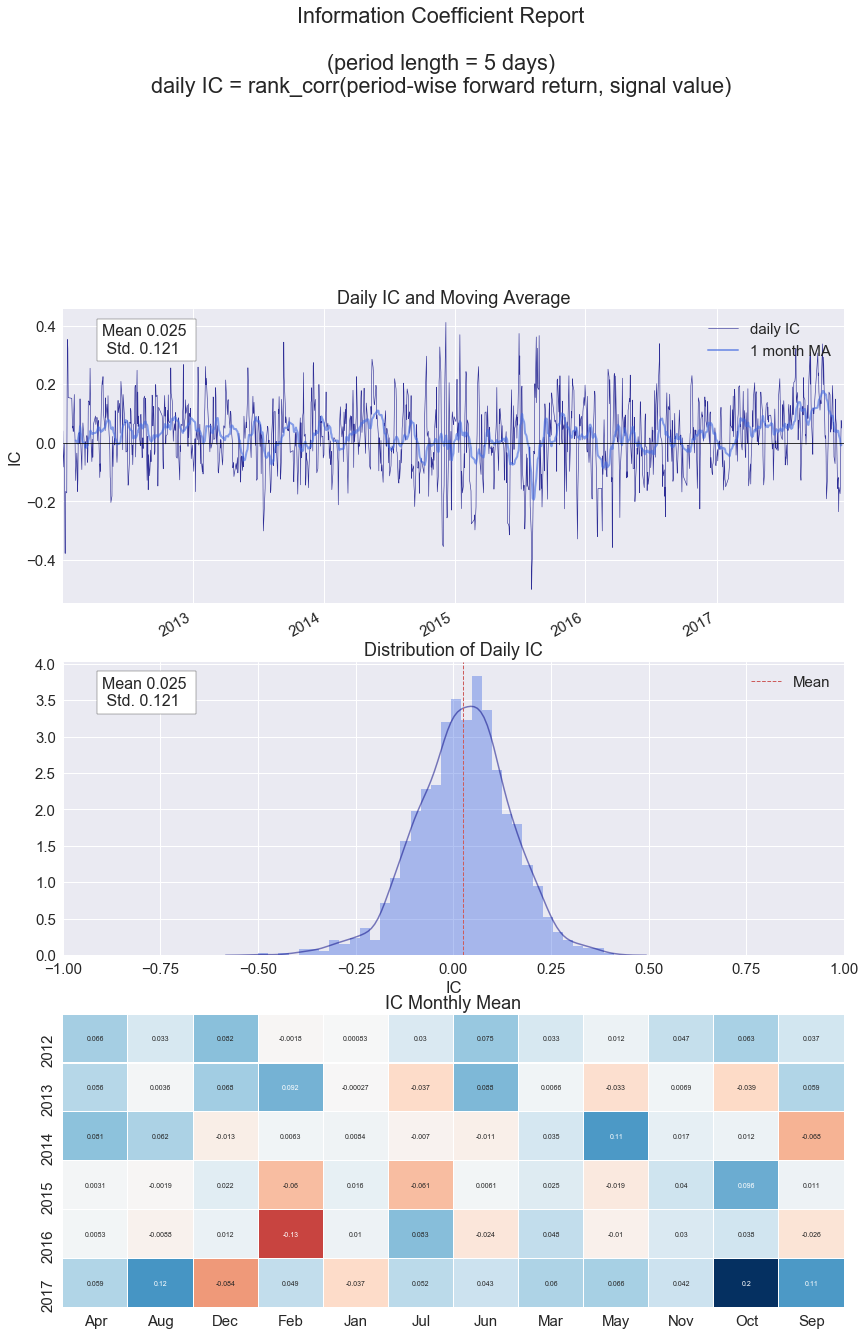

In [6]:
plot_pfm(signal_6,'alpha006')

In [7]:
data_signal = signal_data(signal_6,'alpha006')

Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%


Value of signals of Different Quantiles Statistics
               min       max      mean       std  count    count %
quantile                                                          
1        -9.286524  0.240108 -0.657372  0.158733  83267  20.144527
2        -0.870919  0.524134 -0.404244  0.168361  82671  20.000339
3        -0.750130  0.693992 -0.210936  0.186283  82653  19.995984
4        -0.652176  0.809343  0.002979  0.195213  82671  20.000339
5        -0.486762  1.000000  0.357873  0.233641  82086  19.858811
Figure saved: C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\hs300\alpha006\returns_report.pdf
Information Analysis
                ic
IC Mean      0.025
IC Std.      0.121
t-stat(IC)     NaN
p-value(IC)    NaN
IC Skew        NaN
IC Kurtosis    NaN
Ann. IR      0.206
Figure saved: C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\hs300\alpha006\information_report.pdf


In [8]:
stock_6 = data_signal.signal[data_signal['quantile']==5]

修改索引与列名

In [9]:
from datetime import timedelta
import pandas as pd

def Convert(stock):
    stock_df = stock.unstack()
    stock_df.index = list(map(lambda T: T+timedelta(hours=15) , pd.to_datetime(stock_df.index, format="%Y%m%d")))
    new_names = {}
    for c in stock_df.columns:
        if c.endswith('SZ'):
            new_names[c] = c.replace('SZ', 'XSHE')
        elif c.endswith('SH'):
            new_names[c] = c.replace('SH', 'XSHG')
    stock_df = stock_df.rename_axis(new_names, axis=1)
    return stock_df

In [10]:
stock_df = Convert(stock_6)

## 6_计算权重与保存信号数据

**只做多**

因子值 = [3,5,7,9,2]

每个因子的权重 = 因子值/(3+5+7+9+2)

因子权重之和为1

In [11]:
import numpy as np

factor = [3,5,7,9,2]
weight = factor/np.sum(factor)
print (weight)
print(weight.sum())

[ 0.11538462  0.19230769  0.26923077  0.34615385  0.07692308]
1.0


**因子中性对冲**

因子值 = [3,5,7,-9.-2]

正负分开计算

In [12]:
factor = np.array([3,5,7,-9,-2])
weight = -1*factor[factor<0]/np.sum(factor[factor<0])
print (weight)
print(weight.sum())

[-0.81818182 -0.18181818]
-1.0


In [13]:
weight_list = []
for time_index, weight in stock_df.iterrows():
    weight[weight<0]=0
    weight_result = (weight/weight.sum())
    weight_list.append(weight_result.to_dict())
stock_weight = pd.DataFrame(weight_list, index=stock_df.index)

In [15]:
stock_weight.sum(axis=1).tail()

2017-12-18 15:00:00    1.0
2017-12-19 15:00:00    1.0
2017-12-20 15:00:00    1.0
2017-12-21 15:00:00    1.0
2017-12-22 15:00:00    1.0
dtype: float64

In [16]:
def save_excel(stock_df, name):
    stock_df.to_excel('hs300/%s/%s.xlsx' % (name, name))

In [17]:
save_excel(stock_weight, 'alpha006')

In [18]:
dv.save_dataview('JAQS_Data/hs300')


Store data...
Dataview has been successfully saved to:
C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\JAQS_Data\hs300

You can load it with load_dataview('C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\JAQS_Data\hs300')
